# **Objective :** To predict whether a transcation was fradulent or non-fraudulent



It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains European cardholder transactions that occurred over two days.

feature descriptions-
Time - the seconds elapsed between each transaction and the first transaction in the dataset
V1, V2, …, V28 - principal components obtained through dimensionality reduction (PCA)
Amount - the transaction amount
Class - the response variable, indicating whether a transaction was fraudulent or not

In [1]:
# Import Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# For scaling
from sklearn.preprocessing import StandardScaler

# For splitting data
from sklearn.model_selection import train_test_split

# For Modeling
from sklearn.ensemble import RandomForestClassifier

# For evaluation
from sklearn.metrics import confusion_matrix, f1_score, classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Import Raw Data
#df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df = pd.read_csv('input/creditcard.csv')

# Exploratory Data Analysis

In [3]:
df.shape

(284807, 31)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Observation on Data Quality** : 

* Dataset has already been cleaned and a principle component analysis has been performed to reduce the dimensionality of the data, and also ensuring feature and user confidentiality.since V1, V2, … V28 are the principal components obtained with PCA, V1 to V28 variables are normalized. Variable 'Time' and 'Amount' are not normalized.

* No missing value in the data



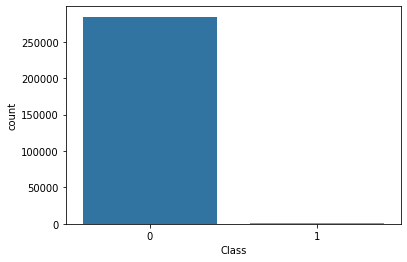

Percent of fraud transaction:  0.1727485630620034 %
Percent of normal transaction:  99.82725143693798 %


In [7]:
sns.countplot(df['Class'])
plt.show()
print('Percent of fraud transaction: ',len(df[df['Class']==1])/len(df['Class'])*100,"%")
print('Percent of normal transaction: ',len(df[df['Class']==0])/len(df['Class'])*100,"%")

**Observation** : Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly unbalanced with respect with target variable Class. Therefor sampling methods will be needed to ensure the model does not overfit or entirely ignore fruad cases.

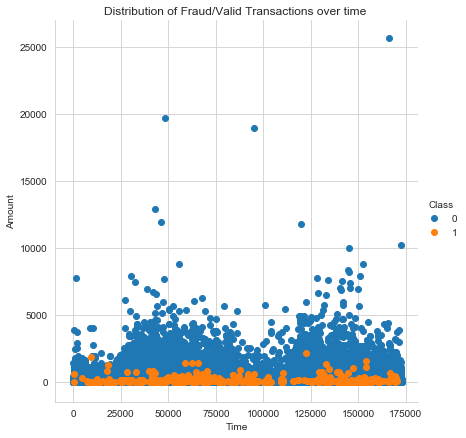

In [8]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", height = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.title("Distribution of Fraud/Valid Transactions over time ")
plt.show()


**Observation**
1. Fradulent Transactions are occuring pretty randomly over time.
2. Transactions which have transaction amount approximately above 2500 have no fraud.


Lets analyze futher the transactions behaviour over hour

In [9]:
# Compute hour from time field which is in at second unit.

df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))
df['Hour'] = df['Hour']%24 # for 2 days

tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df_tmp = pd.DataFrame(tmp)
df_tmp.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df_tmp.head()


,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,7689,462388.19,60.136323,12.140,33685.163962
1,0.0,1,0.0,829.41,6,1820.07,303.345000,230.240,123876.728670
2,1.0,0,0.0,2481.60,4210,263046.13,62.481266,18.965,21224.975009
3,1.0,1,1.0,600.73,10,1279.32,127.932000,45.725,36794.143751
4,2.0,0,0.0,18910.00,3271,229302.70,70.101712,17.450,144596.199828


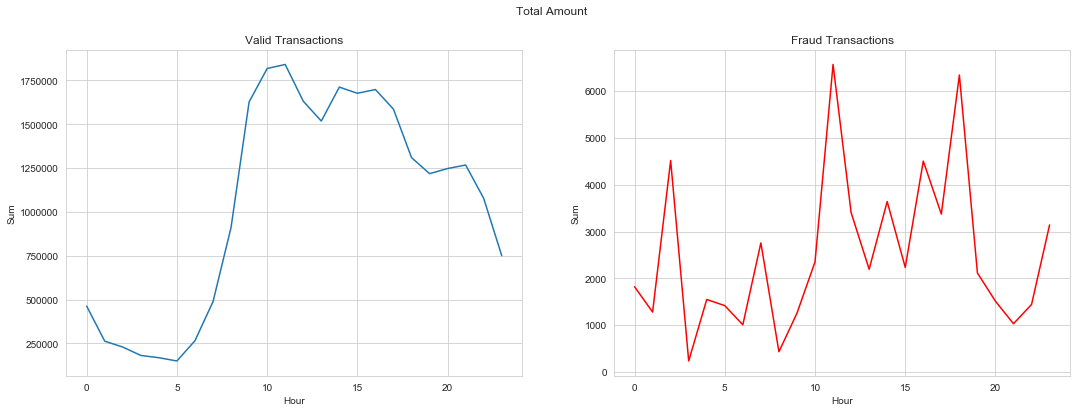

In [10]:
#Plot Transactions distributions over 'Hour'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
plt.ylabel('Amount')
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df_tmp.loc[df_tmp.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df_tmp.loc[df_tmp.Class==1], color="red")

plt.suptitle("Total Amount")

ax1.set_title('Valid Transactions')
ax2.set_title('Fraud Transactions')

plt.show();



**Observation** :  Genuine transaction are happening during day time (9 to 21 hours).

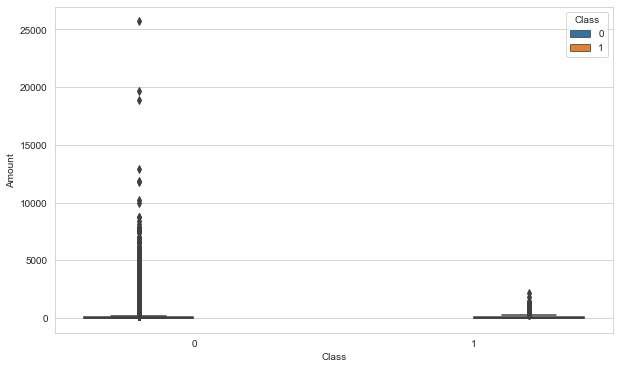

In [11]:
# Check Amount Distribution
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Class', y = 'Amount', data = df, hue = 'Class')

Class
0    22.00
1     9.25
Name: Amount, dtype: float64


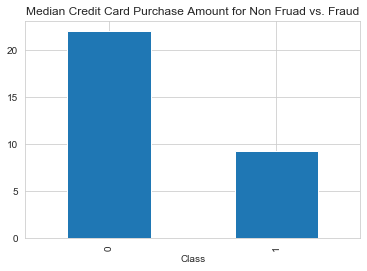

In [12]:
# Check median for fraud and valid transaction amount

print(df.groupby('Class')['Amount'].median())
df.groupby('Class')['Amount'].median().plot.bar()

plt.title('Median Credit Card Purchase Amount for Non Fruad vs. Fraud')
plt.show()

Observations : 
* Median of valid transaction : 22
* Median of fraud transaction : 9.25

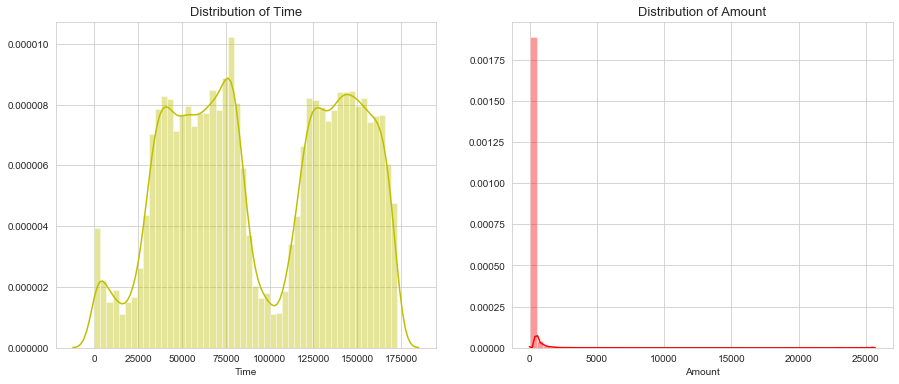

In [13]:
# Time and Amount varibale are skewed and needs to be normalized
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1 = sns.distplot(df['Time'], ax=ax1, color='y')
ax2 = sns.distplot(df['Amount'], ax=ax2, color='r')
ax1.set_title('Distribution of Time', fontsize=13)
ax2.set_title('Distribution of Amount', fontsize=13)
plt.show()

Time and Amount feature needs to be normalized as these are skewed,

In [14]:
# Normalizing Amount & Time Variables using robust scaler

from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time','Hour'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(0, 'scaled_time', scaled_time)
df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


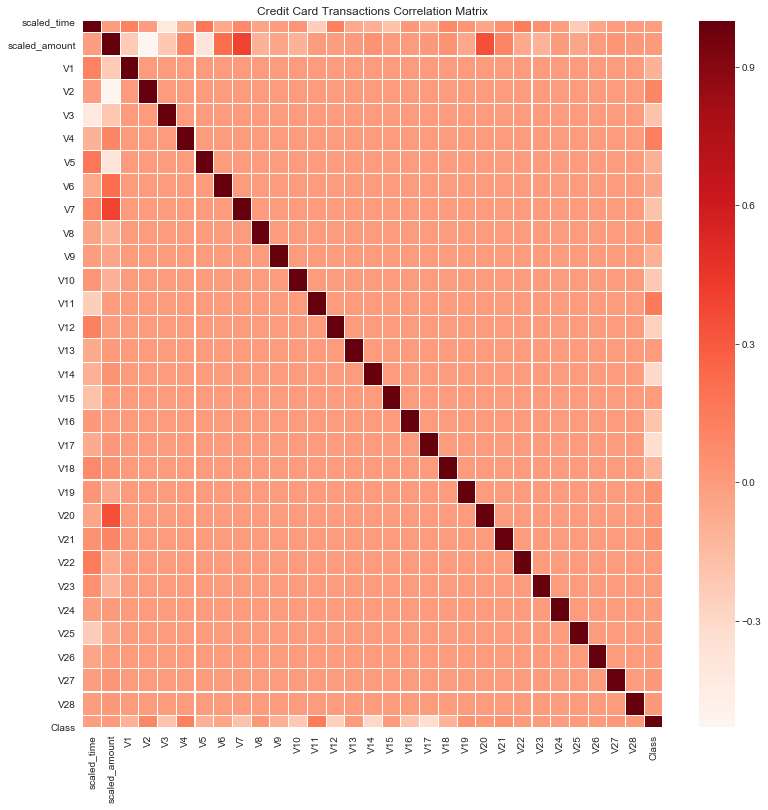

In [15]:
# Check for correlation between features
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),linewidths=.1,cmap='Reds')
plt.title('Credit Card Transactions Correlation Matrix')
plt.show()

Observation : there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

# Model Evaluation Metrics

Since the dataset labels are extremely imbalanced with only 0.18% of instances labeled as fraud, accuracy would be a wrong metric. Given the nature of credit card fraud, and the repurcussions for returning excessive false positives or false negatives, metrics recall and f1-score are better metrics.



# Building Model

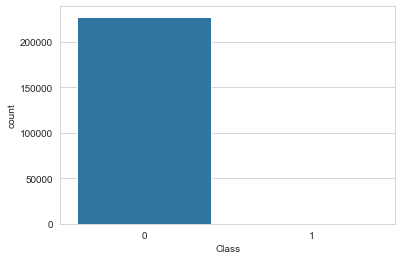

In [16]:
# Train Test Data Split by 80%-20% proportion

y = df['Class']
X = df.drop(['Class'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

y_train.value_counts()

sns.countplot(x=y_train, data=df)
plt.show()

**Balancing Label** : Synthetic Minority Oversampling Technique or SMOTE is a technique to oversample the minority class.In SMOTE new instances are synthesized from the existing data. 
Sampling is performed after data spliting, as the test data should be representative of real world samples (inbalanced). Only the training set will be sampled

In [17]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(sampling_strategy="minority")
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

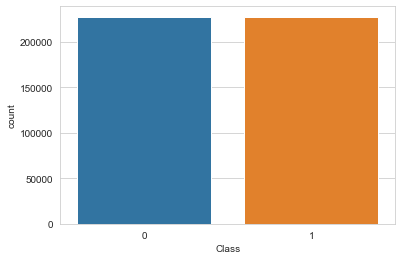

In [18]:
# target variable is now balaned afer SMOTE
sns.countplot(x=y_train_sm, data=df)
plt.show()

# Model Building

In [19]:
smote_random_forest = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, random_state=1)
smote_random_forest.fit(X_train_sm,y_train_sm)

RandomForestClassifier(random_state=1)

# Predict Class

In [20]:
smote_rand_pred = smote_random_forest.predict(X_test)

# Evaluation Model

In [21]:
print(confusion_matrix(y_test,smote_rand_pred))
print("\n")
print(classification_report(y_test,smote_rand_pred))

[[56862     6]
 [   16    78]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.93      0.83      0.88        94

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

